In [1]:
%cd ..

/home/alex404/code/retinal-rl


In [3]:
import numpy as np
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

In [4]:
import black
import jupyter_black

jupyter_black.load(
    lab=False,
    line_length=50,
)

<IPython.core.display.Javascript object>

In [5]:
sim_out = np.load(
    "train_dir/analyze-tester/analyze_out.npy",
    allow_pickle=True,
).tolist()

Images dimensions:
(72, 128, 3, 500)


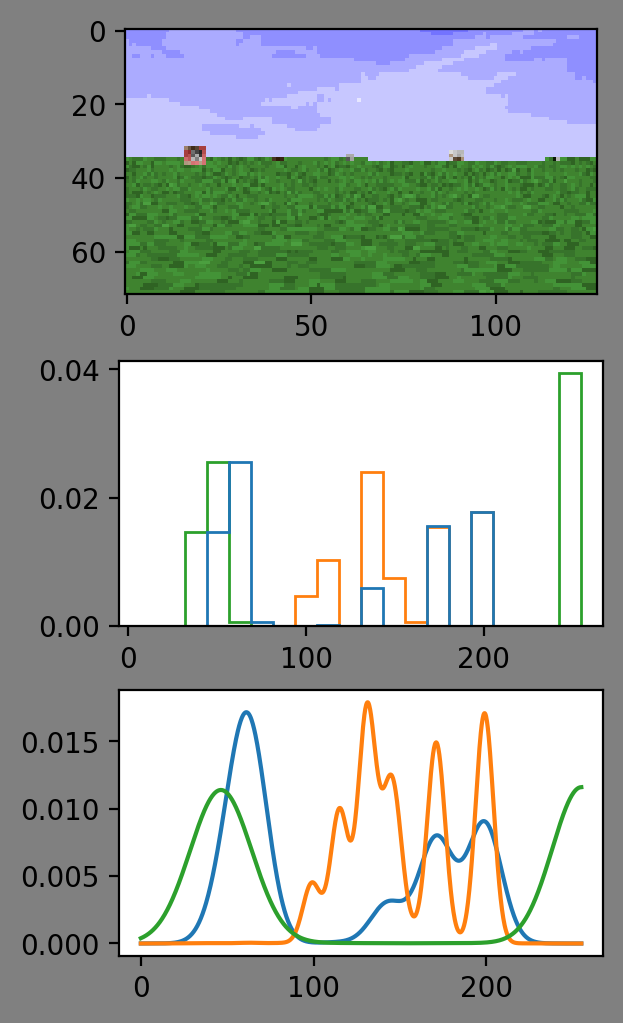

In [44]:
img = imgs[:, :, :, idx]
imgs = sim_out["all_img"]
fltimg = np.reshape(img, (-1, 3))
print("Images dimensions:")
print(imgs.shape)

fig, axs = plt.subplots(
    nrows=3,
    ncols=1,
    figsize=(3, 5),
    facecolor="grey",
    dpi=200,
    layout="constrained",
)

ax0 = axs.flat[0]
ax1 = axs.flat[1]
ax2 = axs.flat[2]

im = ax0.imshow(img)

ax1.hist(
    fltimg,
    bins=20,
    histtype="step",
    fill=False,
    density=True,
)


rkde = stats.gaussian_kde(fltimg[:, 0])
gkde = stats.gaussian_kde(fltimg[:, 1])
bkde = stats.gaussian_kde(fltimg[:, 2])
kdes = np.array(
    [rkde(rng), gkde(rng), bkde(rng)]
).transpose()

rng = np.linspace(0, 255, 1000)
ax2.plot(rng, kdes)

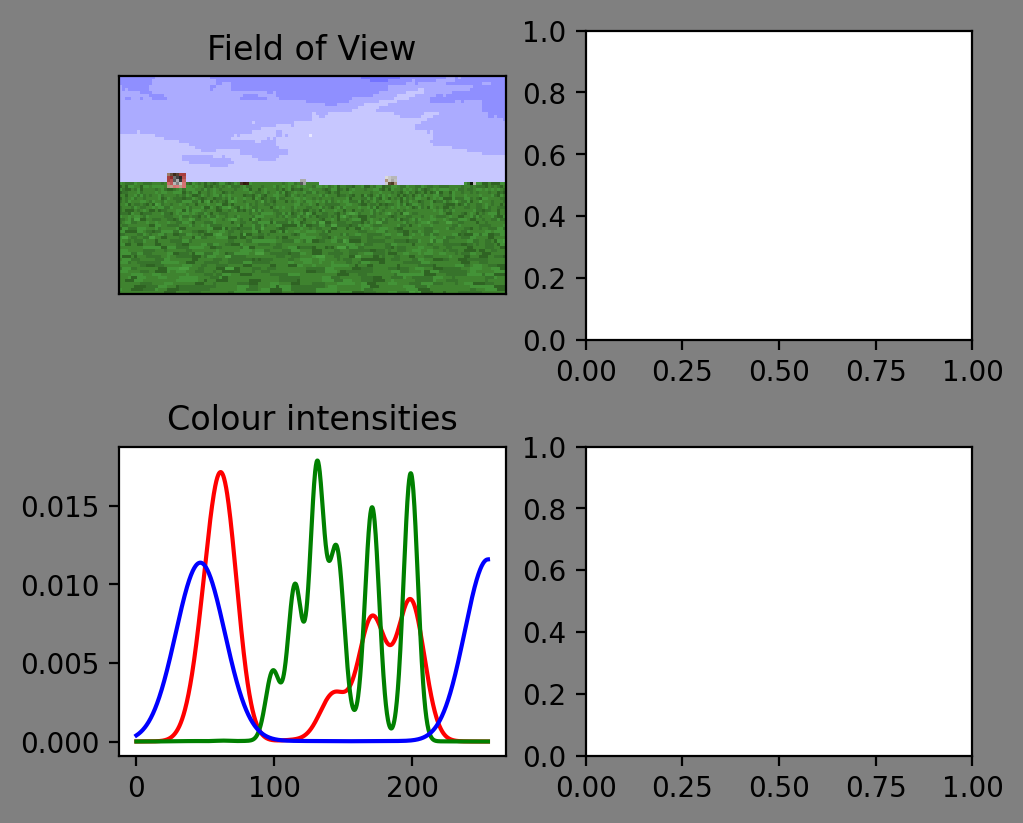

In [42]:
fig, ((tlax, trax), (blax, brax)) = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(5, 4),
    facecolor="grey",
    dpi=200,
    layout="constrained",
)

tlax.set_title("Field of View")
im = tlax.imshow(img, aspect=1)
tlax.set_xticks([])
tlax.set_yticks([])

blax.set_title("Colour intensities")
rng = np.linspace(0, 255, 1000)

rkde = stats.gaussian_kde(fltimg[:, 0])
gkde = stats.gaussian_kde(fltimg[:, 1])
bkde = stats.gaussian_kde(fltimg[:, 2])


(line1,) = blax.plot(rng, rkde(rng), color="red")
(line2,) = blax.plot(
    rng, gkde(rng), color="green"
)
(line3,) = blax.plot(rng, bkde(rng), color="blue")

In [26]:
plt.rcParams["animation.html"] = "jshtml"

def animate(i):
    img = imgs[:, :, :, i]
    fltimg = np.reshape(img, (-1, 3))

    rkde = stats.gaussian_kde(fltimg[:, 0])
    gkde = stats.gaussian_kde(fltimg[:, 1])
    bkde = stats.gaussian_kde(fltimg[:, 2])

    im.set_array(img)

    line1.set_ydata(rkde(rng))
    line2.set_ydata(gkde(rng))
    line3.set_ydata(bkde(rng))

    return top, bottom


anim = FuncAnimation(
    fig,
    animate,
    frames=imgs.shape[3],
    interval=1000 / 35,
)

from IPython.display import HTML

HTML(anim.to_html5_video())

# anim.save(
#    "foo.mp4",
#    fps=35,
#    extra_args=["-vcodec", "libx264"],
# )